## 1. Data (Preparing and loading)

Data can be almost anything in machine learning

- Excel spreadsheet
- Images of any kind
- Videos (like youtube, netflix etc..)
- Audio like songs and podcast
- DNA
- text

Machine learning is a game of two parts:
1. Get data into numbrical representaion
2. Build a model to learns patterns in that numerical representaion

To showcase this lets create some known **data** using linear regression formula

We'll use the linear regression to create the straight line with known **parameters**

In [1]:
import torch

In [2]:
# create the known parameters
weight = 0.7
bias = 0.6

# creating data
start = 0
end = 1
step = 0.03

X = torch.arange(start, end, step)
y = (weight * X) + bias

In [3]:
X

tensor([0.0000, 0.0300, 0.0600, 0.0900, 0.1200, 0.1500, 0.1800, 0.2100, 0.2400,
        0.2700, 0.3000, 0.3300, 0.3600, 0.3900, 0.4200, 0.4500, 0.4800, 0.5100,
        0.5400, 0.5700, 0.6000, 0.6300, 0.6600, 0.6900, 0.7200, 0.7500, 0.7800,
        0.8100, 0.8400, 0.8700, 0.9000, 0.9300, 0.9600, 0.9900])

In [4]:
X[:10]

tensor([0.0000, 0.0300, 0.0600, 0.0900, 0.1200, 0.1500, 0.1800, 0.2100, 0.2400,
        0.2700])

In [5]:
y

tensor([0.6000, 0.6210, 0.6420, 0.6630, 0.6840, 0.7050, 0.7260, 0.7470, 0.7680,
        0.7890, 0.8100, 0.8310, 0.8520, 0.8730, 0.8940, 0.9150, 0.9360, 0.9570,
        0.9780, 0.9990, 1.0200, 1.0410, 1.0620, 1.0830, 1.1040, 1.1250, 1.1460,
        1.1670, 1.1880, 1.2090, 1.2300, 1.2510, 1.2720, 1.2930])

In [6]:
y[:10]

tensor([0.6000, 0.6210, 0.6420, 0.6630, 0.6840, 0.7050, 0.7260, 0.7470, 0.7680,
        0.7890])

In [7]:
len(X), len(y)

(34, 34)

### splitting the data into training and testing sets(One of the most important steps in machine learning in general)
- lets create a training and test sets using our data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 23)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([20]), torch.Size([14]), torch.Size([20]), torch.Size([14]))

In [11]:
import matplotlib.pyplot as plt

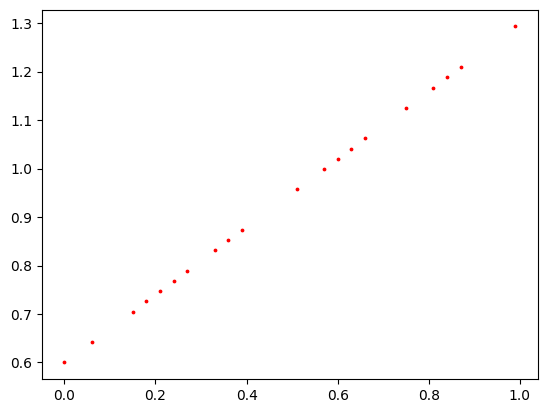

In [12]:
plt.scatter(X_train, y_train, c="r", s=3, label="trainig data")
plt.show()

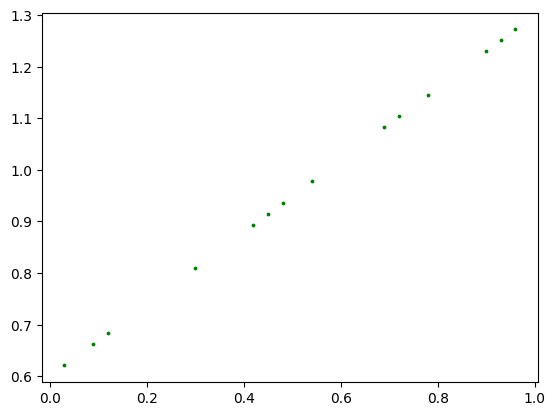

In [13]:
plt.scatter(X_test, y_test, c="g", s=3, label="testing data")
plt.show()

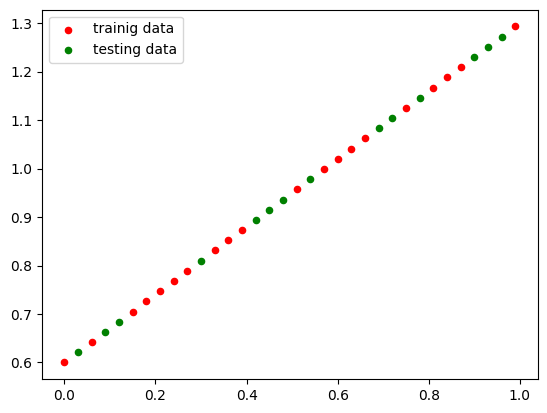

In [14]:
plt.scatter(X_train, y_train, c="r", s=20, label="trainig data")
plt.scatter(X_test, y_test, c="g", s=20, label="testing data")
plt.legend()
plt.show()

## 2. Building the model

Our first PyTorch Model

This is very exciting... let's do it

### what does our model do:

- Starts with the random values of (weights and bias)
- Looka at the training data and adjust the random values of the weights and bais to better represents (or get closer to) the ideal values of weights and bias.

### How does it do so?
Through two main algorithms
1. Gradients descents
2. Backpropagation



In [15]:
from torch import nn

In [16]:
# creating a linear regression class
class LinearRegressionModel(nn.Module): ## almost everything in PyTorch starts with nn.module

  def __init__(self) -> None:
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype = torch.float))

  # forward methord to define the computations in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor :
    return self.weights * x + bias  # this is linear regression formula


## PyTorch building essentials
- torch.nn =>	Contains all of the building blocks for computational graphs(NN) (essentially a series of computations executed in a particular way).
- torch.nn.Parameter =>	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
- torch.nn.Module =>	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
- torch.optim	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
- def forward()	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).


## Checking the contents of our model

Now we have created a model, lets check what inside it....

So we can check our model's parameters or whats inside using .parameters()

In [17]:
# creating a random see
torch.manual_seed(3)

# create an instance of the model (this is a subclass of teh nn.Module)
model = LinearRegressionModel()
print(model.weights)
print(model.bias)
print("")
list(model.parameters())

Parameter containing:
tensor([0.8033], requires_grad=True)
Parameter containing:
tensor([0.1748], requires_grad=True)



[Parameter containing:
 tensor([0.8033], requires_grad=True),
 Parameter containing:
 tensor([0.1748], requires_grad=True)]

In [18]:
# list parameters names
print(list(model.state_dict()))
model.state_dict()

['weights', 'bias']


OrderedDict([('weights', tensor([0.8033])), ('bias', tensor([0.1748]))])

In [19]:
weight, bias #our model try to achive these ideal values

(0.7, 0.6)

## making prediction using torch.inference_mode()
To check our model's predictive power, let see how well it predicts "y_test" based on "X_test"

When we pass the data through our model, its going to run it through forward() method.

In [20]:
with torch.inference_mode():
  y_pred2 = model(X_test)

In [21]:
y_pred2

tensor([1.2266, 1.1543, 1.1784, 1.3470, 0.9374, 1.3229, 0.6964, 1.0338, 0.6241,
        0.6723, 0.9615, 0.8410, 1.3711, 0.9856])

In [22]:
y_test

tensor([1.1460, 1.0830, 1.1040, 1.2510, 0.8940, 1.2300, 0.6840, 0.9780, 0.6210,
        0.6630, 0.9150, 0.8100, 1.2720, 0.9360])

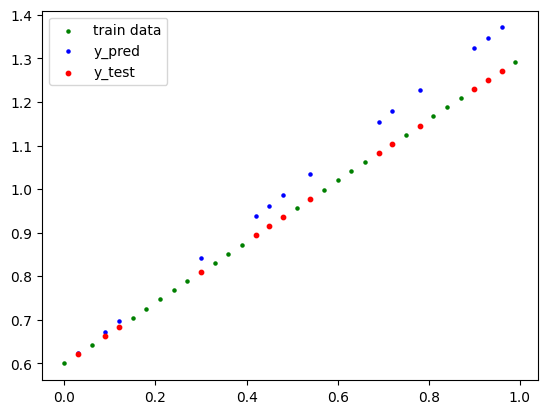

In [23]:
plt.scatter(X_train, y_train, c="g", s=5, label="train data")
plt.scatter(X_test, y_pred2, c="b", s=5, label="y_pred")
plt.scatter(X_test, y_test, c="r", s=10, label="y_test")
plt.legend()
plt.show()

In [24]:
residuals = y_pred2 - y_test

In [25]:
residuals

tensor([0.0806, 0.0713, 0.0744, 0.0960, 0.0434, 0.0929, 0.0124, 0.0558, 0.0031,
        0.0093, 0.0465, 0.0310, 0.0991, 0.0496])

In [26]:
%%time
with torch.inference_mode():
  y_pred2 = model(X_test)
y_pred2

CPU times: user 249 µs, sys: 37 µs, total: 286 µs
Wall time: 294 µs


tensor([1.2266, 1.1543, 1.1784, 1.3470, 0.9374, 1.3229, 0.6964, 1.0338, 0.6241,
        0.6723, 0.9615, 0.8410, 1.3711, 0.9856])

In [27]:
%%time
with torch.no_grad():
  y_pred1 = model(X_test)
y_pred1

CPU times: user 282 µs, sys: 0 ns, total: 282 µs
Wall time: 289 µs


tensor([1.2266, 1.1543, 1.1784, 1.3470, 0.9374, 1.3229, 0.6964, 1.0338, 0.6241,
        0.6723, 0.9615, 0.8410, 1.3711, 0.9856])

- One way to know that how poor or wrong our model is make prediction to use the **Loss fucntion**

* Note:- loss fucntions may also called cost fucntions or criterian in different areas, but in our case we wil refer it as loss function

Things we need to train

- **Loss function:** A function to measure that how wrong our model's predictions are to the ideal outputs. Lower is better
- **Optimizer:** Takes into account the loss of a model and adjust the parameters (e.g. weights & bias)

Any PyTorch model we need:
1. Training loop
2. Testing loop

In [28]:
list(model.parameters())

[Parameter containing:
 tensor([0.8033], requires_grad=True),
 Parameter containing:
 tensor([0.1748], requires_grad=True)]

In [29]:
# checking our model's parameters (a parameter is a value that the model sets itself.)
model.state_dict()

OrderedDict([('weights', tensor([0.8033])), ('bias', tensor([0.1748]))])

In [30]:
# setup a loss function
loss_fc = nn.L1Loss()

# setup an optimizer (stochastic gradient discent)
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.01,) # learning rate -> possible the most common parameter you can set.


## which loss function should I use?

This will be problem specific, But with experience, we will get the idea of what works and what doesn't with your perticular problem set.

For e.g for regression problem (like ours), a loss function of nn.L1Loss() and optimizer like torch.optim.SGD() will suffice.and

But for classification problem like classifying whether a photo is dog or cat, we likely want to use the loss function of nn.BCELoss() (Binary cross entropy)

## Building a training loop and testing in PyTorch

A couple of things we need in a training LookupError:
0. Loop through data
1. Forward pass -> (this involves the data moving through our model's forward() function to make predictions on the data -> also called **forward propagation**)
2. Calculate the loss (compare the forward pass predictions to ground truth lables)
3. Optimizer zero grad
4. Loss backword -> moves backword through the netwrok to calculate the gradients of the each of the parameters of our model with respect to the loss (**backwordpropagation**)
5. Optimizer step -> use the optimizer to adjust the performance of our model to try and improve the loss (**gradient descent**)


In [31]:
torch.manual_seed(42)

epochs = 1 # Set the number of epochs (how many times the model will pass over the training data)

### Training
for epoch in range(epochs):

  # Put model in training mode (this is the default state of a model)
  model.train()

  # 1. Forward pass on train data using the forward() method inside
  y_pred = model(X_train)

  # 2. Calculate the loss (how different are our models predictions to the ground truth)
  loss = loss_fc(y_pred, y_train)

  print(f"Loss: {loss}")

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Progress the optimizer (perform the gradient descent)
  optimizer.step()

  ## Testing

  model.eval()

  print(model.state_dict())

Loss: 0.04864302650094032
OrderedDict([('weights', tensor([0.7986])), ('bias', tensor([0.1748]))])


In [32]:
weight, bias

(0.7, 0.6)

In [33]:
with torch.inference_mode():
  y_pred_new = model(X_test)

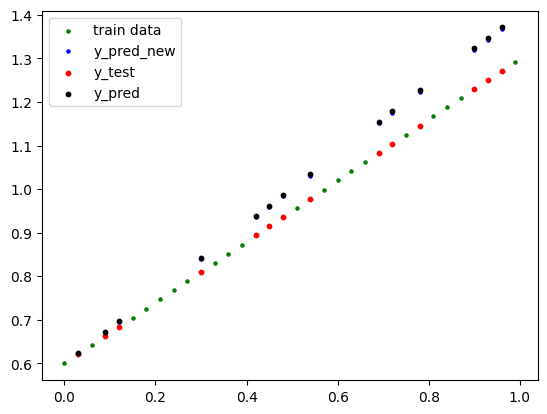

In [34]:
plt.scatter(X_train, y_train, c="g", s=5, label="train data")
plt.scatter(X_test, y_pred_new, c="b", s=5, label="y_pred_new")
plt.scatter(X_test, y_test, c="r", s=10, label="y_test")
plt.scatter(X_test, y_pred1, c="black", s=10, label="y_pred")
plt.legend()
plt.show()

In [35]:
# torch.manual_seed(42)

epochs = 100 # Set the number of epochs (how many times the model will pass over the training data)

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

### Training
for epoch in range(epochs):

  # Put model in training mode (this is the default state of a model)
  model.train()

  # 1. Forward pass on train data using the forward() method inside
  y_pred = model(X_train)

  # 2. Calculate the loss (how different are our models predictions to the ground truth)
  loss = loss_fc(y_pred, y_train)
  # print(f"loss: {loss}")

  #print(f"Loss: {loss}")

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Progress the optimizer (perform the gradient descent)
  optimizer.step()

  ## Testing

  model.eval() # this turn off some settings in model not nedeed for evaluation/testing (dropout/norm layers)

  # we can also use torch.no_grad() here (we can see it in older code of Pytorch)
  with torch.inference_mode(): # turns off the gradient tracking and couple more things behind the scene

    #1. do the forward pass
    test_pred = model(X_test)

    # 2. Calculate the loss
    test_loss = loss_fc(test_pred, y_test)
    # print(f"test_loss: {test_loss}")

    # print(f"epoch: {epoch} | loss: {loss} | test_loss: {test_loss}")
  # printing out what happenin
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.046424608677625656 | MAE Test Loss: 0.04967665299773216 
Epoch: 10 | MAE Train Loss: 0.024240434169769287 | MAE Test Loss: 0.024747202172875404 
Epoch: 20 | MAE Train Loss: 0.002056232187896967 | MAE Test Loss: 0.00018226249085273594 
Epoch: 30 | MAE Train Loss: 0.002056232187896967 | MAE Test Loss: 0.00018226249085273594 
Epoch: 40 | MAE Train Loss: 0.002056232187896967 | MAE Test Loss: 0.00018226249085273594 
Epoch: 50 | MAE Train Loss: 0.002056232187896967 | MAE Test Loss: 0.00018226249085273594 
Epoch: 60 | MAE Train Loss: 0.002056232187896967 | MAE Test Loss: 0.00018226249085273594 
Epoch: 70 | MAE Train Loss: 0.002056232187896967 | MAE Test Loss: 0.00018226249085273594 
Epoch: 80 | MAE Train Loss: 0.002056232187896967 | MAE Test Loss: 0.00018226249085273594 
Epoch: 90 | MAE Train Loss: 0.002056232187896967 | MAE Test Loss: 0.00018226249085273594 


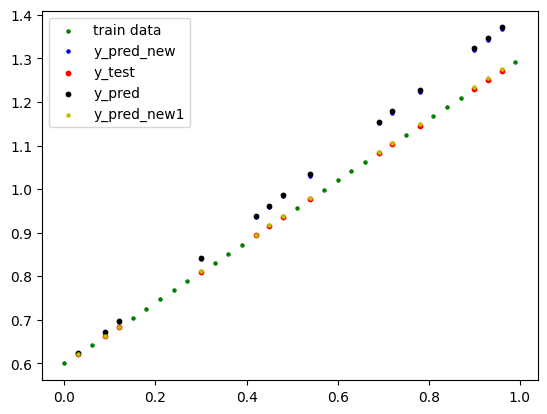

In [36]:
plt.scatter(X_train, y_train, c="g", s=5, label="train data")
plt.scatter(X_test, y_pred_new, c="b", s=5, label="y_pred_new")
plt.scatter(X_test, y_test, c="r", s=10, label="y_test")
plt.scatter(X_test, y_pred1, c="black", s=10, label="y_pred")
plt.scatter(X_test, test_pred, c="y", s=5, label="y_pred_new1")
plt.legend()
plt.show()

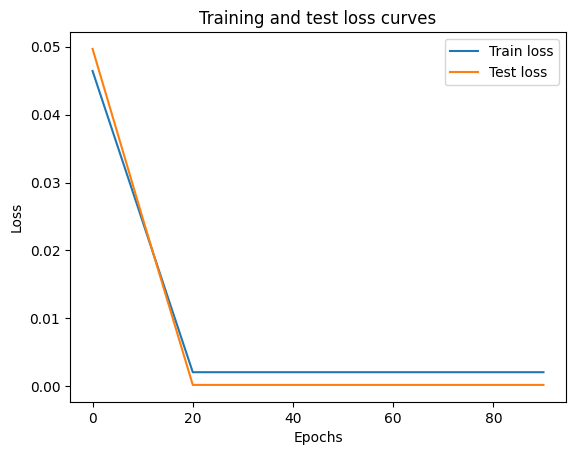

In [37]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## saving a model in PyTorch

In [41]:
torch.save(model.state_dict(), "/content/drive/MyDrive/pytorch/model.pth")

### load a model in PyTorch

In [44]:
model1 = LinearRegressionModel()
model1.load_state_dict(torch.load("model.pth"))

<ipython-input-44-45a8d05eae91>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load("model.pth"))


<All keys matched successfully>

In [46]:
## save the entire model
torch.save(model, "entire_model.pth")

In [48]:
## load the entire model
ab = torch.load("entire_model.pth")

<ipython-input-48-e10dc3173043>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ab = torch.load("entire_model.pth")


In [51]:
list(ab.parameters())

[Parameter containing:
 tensor([0.7044], requires_grad=True),
 Parameter containing:
 tensor([0.1748], requires_grad=True)]

In [54]:
ab.weights, ab.bias

(Parameter containing:
 tensor([0.7044], requires_grad=True),
 Parameter containing:
 tensor([0.1748], requires_grad=True))